# Lab 2: Loading, Modifying and Saving Images

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: 16/06/2023

---------------

## `Objective`: 
1. Load an image  
1. Do modifications such as changing color of the image ( grayscale, (R,B,G) )  
1. Change size of the image (quarter, half)  
1. Save the images with appropriate names

## `Completion Status`:

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |
| 4 | Completed |

## `Code`:

In [6]:
# Importing all the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

### **Q1) Load an image**

In [2]:
# Loading the image
image = cv2.imread("D:/Z/Downloads/Lenna_(test_image).png")

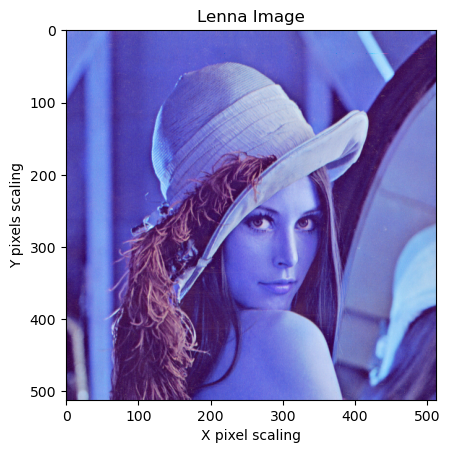

In [3]:
# Plotting the image
plt.title("Lenna Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
plt.imshow(image) 
plt.show()

### **Q2) Do modifications such as changing color of the image**

#### 2.1) Changing Colour Spaces

In [4]:
# Converting the original image to different colour spaces

image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB Image
image_GRAY = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #GRAYSCALE Image
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # HSV Image
image_YUV = cv2.cvtColor(image, cv2.COLOR_BGR2YUV) # YUV Image
bret, image_BIN = cv2.threshold(image_GRAY, 127, 255, cv2.THRESH_BINARY) # BINARY Image
image_INV_BIN = cv2.bitwise_not(image_BIN) # INVERSE BINARY Image
image_LAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB) # LAB Image
image_YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb) # YCrCb Image

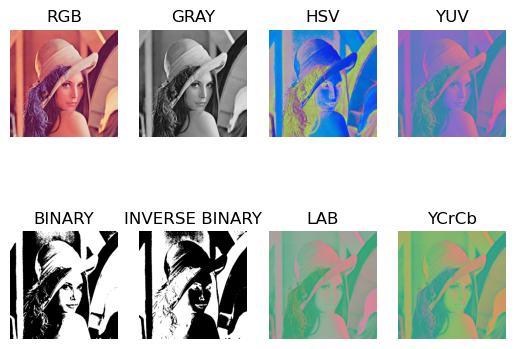

In [5]:
# Plotting all the various colour spcaes
plt.subplot(241),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB'), plt.axis('off')
plt.subplot(242),plt.imshow(image_GRAY, cmap = 'gray'),plt.title('GRAY'),plt.axis('off')
plt.subplot(243),plt.imshow(image_HSV, cmap = 'gray'),plt.title('HSV'),plt.axis('off')
plt.subplot(244),plt.imshow(image_YUV, cmap = 'gray'),plt.title('YUV'),plt.axis('off')
plt.subplot(245),plt.imshow(image_BIN, cmap = 'gray'),plt.title('BINARY'),plt.axis('off')
plt.subplot(246),plt.imshow(image_INV_BIN, cmap = 'gray'),plt.title('INVERSE BINARY'),plt.axis('off')
plt.subplot(247),plt.imshow(image_LAB, cmap = 'gray'),plt.title('LAB'),plt.axis('off')
plt.subplot(248),plt.imshow(image_YCrCb, cmap = 'gray'),plt.title('YCrCb'),plt.axis('off')
plt.show()

#### 2.2) Sharpening Image

In [7]:
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

image_sharpened = cv2.filter2D(image_RGB, -1, kernel)

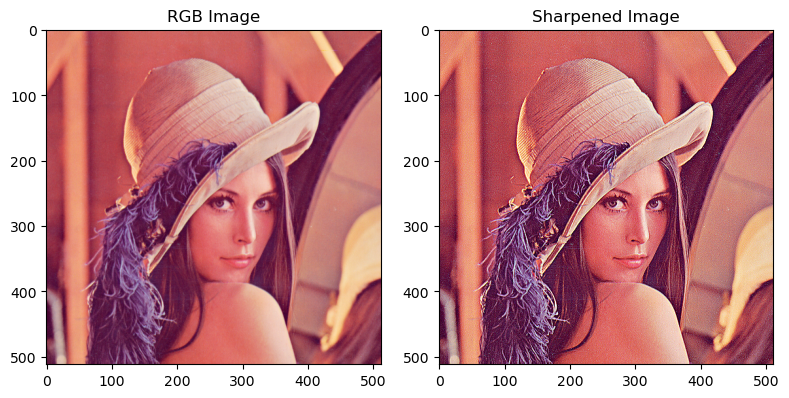

In [10]:
fig1, ax = plt.subplots(1, 2, figsize = (8, 8))
fig1.tight_layout()

ax[0].imshow(image_RGB)
ax[0].set_title("RGB Image")

ax[1].imshow(image_sharpened)
ax[1].set_title("Sharpened Image")

plt.show()

#### 2.3) Changing the background of the image to a solid colour

In [23]:
# Importing an image with object 
image2 = cv2.imread("D:/Z/Downloads/pizza.jpg")

# RGB Image
image2_RGB = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

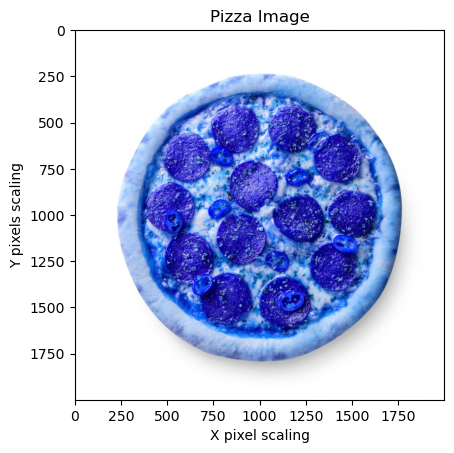

In [24]:
# Plotting the image
plt.title("Pizza Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
plt.imshow(image2) 
plt.show()

In [25]:
# Setting up the lower and upper values of the mask
lower_blue = np.array([0, 150, 220])
upper_blue = np.array([255, 255, 255])

# Creating a mask of an image
mask = cv2.inRange(image2_RGB, lower_blue, upper_blue)

# Creating a new image with layer over layer
masked_image = np.copy(image2_RGB)
masked_image[mask != 0] = [0, 255, 0] # [Red, Green, Blue]

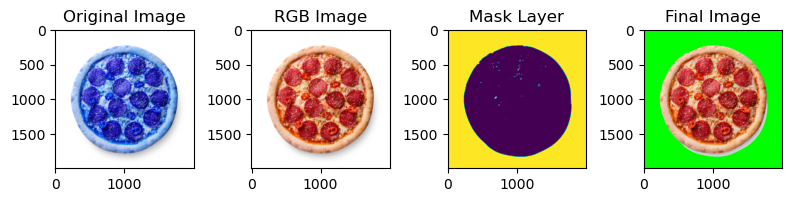

In [26]:
# Sub plot of multiple images

fig1, ax = plt.subplots(1, 4, figsize = (8, 8))
fig1.tight_layout()

ax[0].imshow(image2)
ax[0].set_title("Original Image")

ax[1].imshow(image2_RGB)
ax[1].set_title("RGB Image")

ax[2].imshow(mask)
ax[2].set_title("Mask Layer")

ax[3].imshow(masked_image)
ax[3].set_title("Final Image")

plt.show()

#### 2.3) Changing the background of the image to another image

In [31]:
bg_image = cv2.imread("D:/Z/Downloads/pizza_bg3.webp")
bg_image_RGB = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB) # RGB Image
bg_image_RGB_copy = np.copy(bg_image_RGB) # copy of RGB Image

bg_image[mask == 0] = [0,0,0] # 
complete_image = masked_image + bg_image # Creating a new image with layer over layer

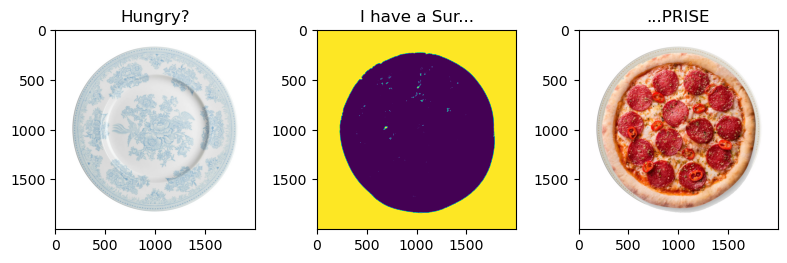

In [32]:
# Sub plot of multiple images

fig1, ax = plt.subplots(1, 3, figsize = (8, 8))
fig1.tight_layout()

ax[0].imshow(bg_image_RGB_copy)
ax[0].set_title("Hungry?")

ax[1].imshow(mask)
ax[1].set_title("I have a Sur...")

ax[2].imshow(complete_image)
ax[2].set_title("...PRISE")

plt.show()

### **Q3) Change size of the image**

#### 3.1) Resizing the image to half

In [34]:
new_size = (int(image2.shape[0]/2), int(image2.shape[1]/2)) # new size: HALF
image_half = cv2.resize(image_RGB, new_size) # resizing the image

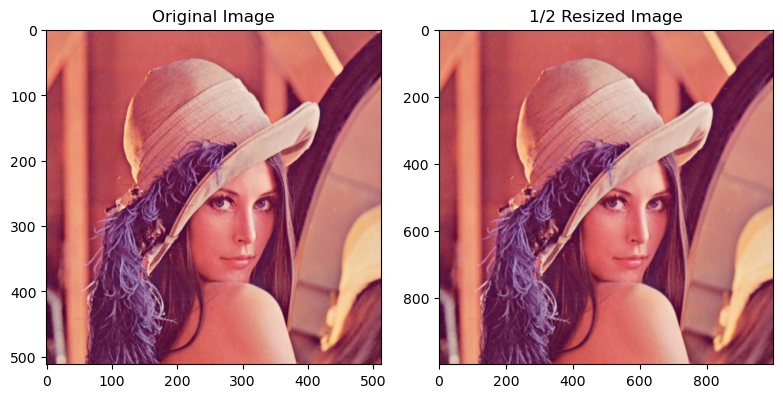

In [40]:
# Sub plot of multiple images

fig1, ax = plt.subplots(1, 2, figsize = (8, 8))
fig1.tight_layout()

ax[0].imshow(image_RGB)
ax[0].set_title("Original Image")

ax[1].imshow(image_half)
ax[1].set_title("1/2 Resized Image")

plt.show()

#### 3.2) Resizing the image to a quarter

In [37]:
new_size = (int(image2.shape[0]/4), int(image2.shape[1]/4)) # new size: QUARTER
image_quarter = cv2.resize(image_RGB, new_size) # resizing the image

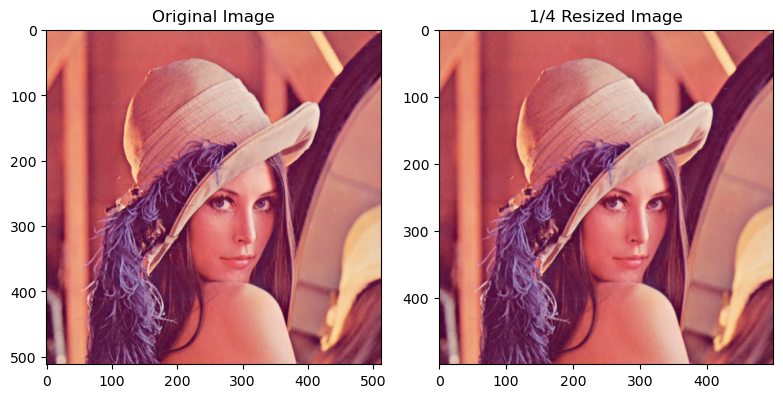

In [39]:
# Sub plot of multiple images

fig1, ax = plt.subplots(1, 2, figsize = (8, 8))
fig1.tight_layout()

ax[0].imshow(image_RGB)
ax[0].set_title("Original Image")

ax[1].imshow(image_quarter)
ax[1].set_title("1/4 Resized Image")

plt.show()

### **Q4) Save the images with appropriate names**

In [41]:
cv2.imwrite("LAB2_Lenna_Quarter.jpg", image_quarter)
cv2.imwrite("LAB2_Lenna_Half.png", image_half)
cv2.imwrite("LAB2_Lenna_Grayscale.jpg", image_GRAY)

True

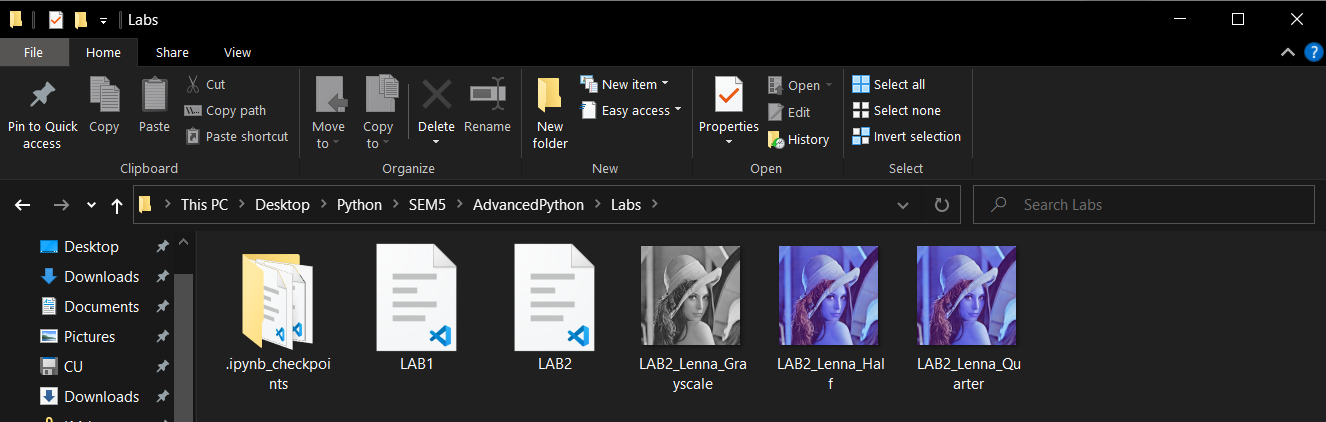

<hr>